# Prep

In [5]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 34.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
#import requuired libraries
import pandas as pd
import numpy as np
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = 'UpsampledDataset.csv'
upsampled = pd.read_csv(data)

In [11]:
X = upsampled.drop('is_default', axis=1)
y = upsampled['is_default']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model using bi directional elimination

In [ ]:
from sklearn.feature_selection import RFE
rf_model = RandomForestClassifier(random_state=42)

# Fit the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the initial model
y_pred_initial = rf_model.predict(X_test)
accuracy_initial = accuracy_score(y_test, y_pred_initial)
print(f'Accuracy with all features: {accuracy_initial}')

# Use Recursive Feature Elimination (RFE) for backward elimination
# Choose the number of features to keep
n_features_to_keep = 5

rfe = RFE(estimator=rf_model, n_features_to_select=n_features_to_keep)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Print the selected features
selected_features = X_train.columns[rfe.support_]
print(f'Selected Features: {selected_features.tolist()}')

# Fit the Random Forest model on the reduced feature set
rf_model.fit(X_train_rfe, y_train)

# Evaluate the model after backward elimination
y_pred_after_elimination = rf_model.predict(X_test_rfe)
accuracy_after_elimination = accuracy_score(y_test, y_pred_after_elimination)
print(f'Accuracy after backward elimination: {accuracy_after_elimination}')

Accuracy with all features: 0.9999146245059288


In [ ]:
print("\nRFC Classification Report:\n", classification_report(y_test, y_pred_initial))
print("\nRFC Classification Report:\n", classification_report(y_test, y_pred_after_elimination))


RFC Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1942
           1       1.00      1.00      1.00      1923

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865


RFC Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1942
           1       1.00      1.00      1.00      1923

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



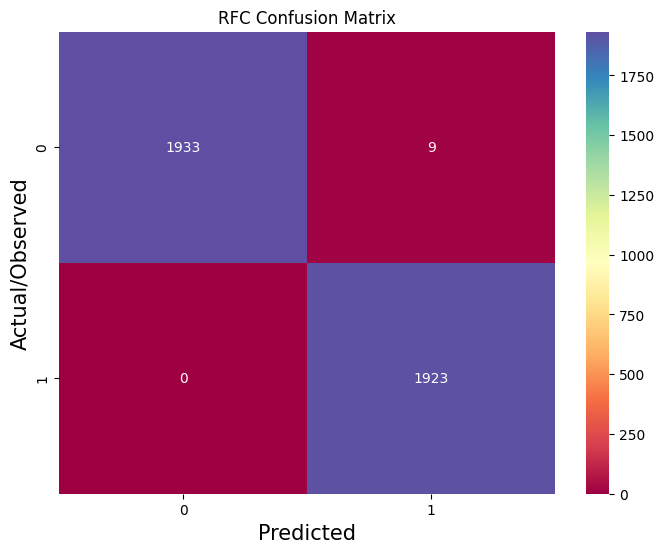

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_after_elimination)

plt.figure(figsize = (8,6))

sns.heatmap(cm,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("RFC Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

#KNN using bi directional elimination

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
knn_model = KNeighborsClassifier()

# Number of features to select
n_features_to_select = 5  # Adjust this based on your preference or after experimentation

# Forward feature selection
sfs = SequentialFeatureSelector(knn_model,
                                 k_features=n_features_to_select,
                                 forward=True,
                                 floating=False,
                                 verbose=2,
                                 scoring='accuracy',
                                 cv=5)

In [ ]:
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_
# Print the selected wrapper features
selected_features = X_train.columns[list(selected_feature_indices)]
print(f'\nSelected Wrapper Features: {selected_features.tolist()}')

# Extract the selected features from the training and testing data
X_train_selected = X_train.iloc[:, list(selected_feature_indices)]
X_test_selected = X_test.iloc[:, list(selected_feature_indices)]

# Fit KNN on the selected features
knn_model.fit(X_train_selected, y_train)

# Predict using the trained KNN model
y_pred_knn = knn_model.predict(X_test_selected)

# Evaluate the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'\nAccuracy with selected features using KNN: {accuracy_knn}')


[2023-12-01 23:52:54] Features: 1/5 -- score: 0.9342041515178021
[2023-12-01 23:53:04] Features: 2/5 -- score: 0.9685581559449605
[2023-12-01 23:53:13] Features: 3/5 -- score: 0.9713398201932497
[2023-12-01 23:53:20] Features: 4/5 -- score: 0.9714045241725445
[2023-12-01 23:53:28] Features: 5/5 -- score: 0.9714692281518392


Selected Wrapper Features: ['UDI', 'Torque [Nm]', 'Tool wear [min]', 'HDF', 'PWF']

Accuracy with selected features using KNN: 0.9759379042690814


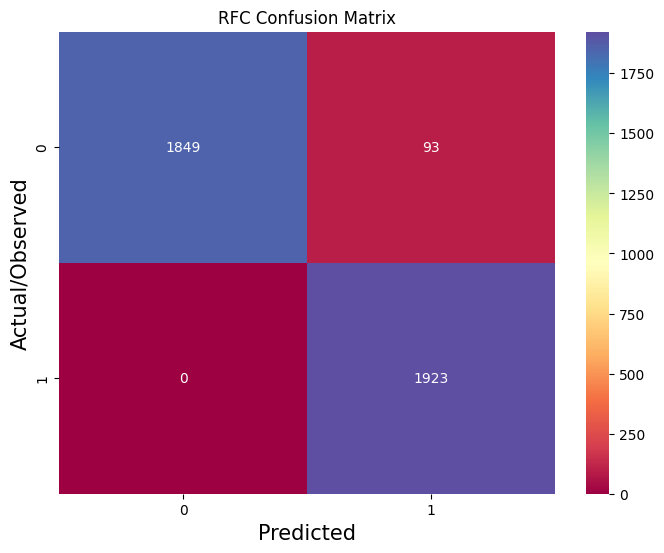

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize = (8,6))

sns.heatmap(cm,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("RFC Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);